✅ Cleaned combined metrics:


,model,accuracy,auc,f1
0,xgboost,0.976378,0.929825,0.869565
1,image,0.400000,NaN,NaN
2,image,0.400000,NaN,NaN
3,image,0.400000,NaN,NaN
4,image,0.400000,NaN,NaN
5,clinical+image_fusion_xgb,1.000000,NaN,0.000000


✅ Duplicates removed:


,model,accuracy,auc,f1
0,xgboost,0.976378,0.929825,0.869565
1,image,0.400000,NaN,NaN
2,clinical+image_fusion_xgb,1.000000,NaN,0.000000


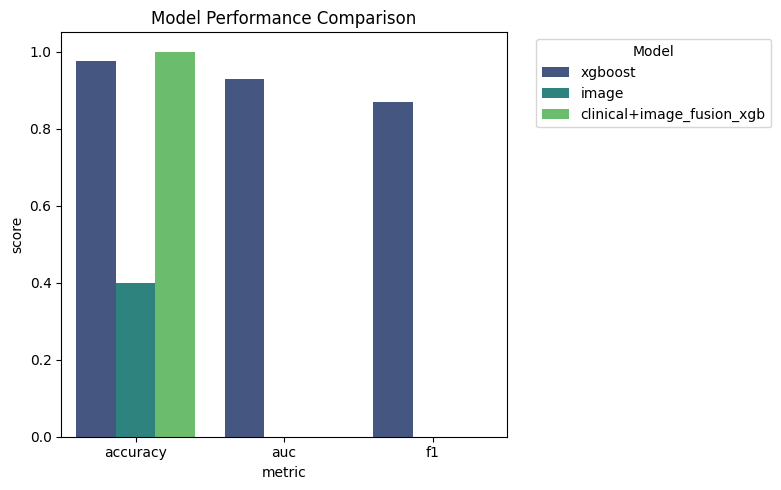

✅ Saved summary CSV to: results\report\final_summary.csv
✅ Exported report to: results\report\final_summary.pdf

📊 Final Summary:


,model,accuracy,auc,f1
0,xgboost,0.976378,0.929825,0.869565
1,image,0.400000,NaN,NaN
2,clinical+image_fusion_xgb,1.000000,NaN,0.000000



🏆 Ranked Summary:


,accuracy,auc,f1
model,,,
xgboost,0.976378,0.929825,0.869565
image,0.400000,NaN,NaN
clinical+image_fusion_xgb,1.000000,NaN,0.000000



🥇 Best model per metric:


accuracy    clinical+image_fusion_xgb
auc                           xgboost
f1                            xgboost
dtype: object

In [5]:
# 10_final_report.ipynb
# --------------------------------------------------
import os
os.chdir(r"C:\Users\Negar\Desktop\paper_results\Myself\cr_coad_project")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# --------------------------------------------------
# 10_final_report_cleaned.ipynb (replacement section)

import os
os.chdir(r"C:\Users\Negar\Desktop\paper_results\Myself\cr_coad_project")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# --------------------------------------------------
# LOAD METRICS (cleaned)
# --- Clean load section ---
def load_metrics(path, model_name):
    df = pd.read_csv(path)
    # If there's no "model" column, add it
    if "model" not in df.columns:
        df["model"] = model_name
    keep_cols = [c for c in df.columns if c in ["model", "accuracy", "auc", "f1"]]
    df = df[keep_cols]
    return df

paths = {
    "clinical": "results/clinical/eval_metrics.csv",
    "image": "results/images/eval_metrics.csv",
    "fusion": "results/fusion/eval_metrics.csv"
}

dfs = []
for name, p in paths.items():
    p = Path(p)
    if p.exists():
        df = load_metrics(p, model_name=name)
        dfs.append(df)
    else:
        print(f"⚠️ Missing file: {p}")

metrics_df = pd.concat(dfs, ignore_index=True)
print("✅ Cleaned combined metrics:")
display(metrics_df)

# Remove duplicate model rows (keep latest)
metrics_df = metrics_df.drop_duplicates(subset=["model"], keep="last").reset_index(drop=True)
print("✅ Duplicates removed:")
display(metrics_df)

# --------------------------------------------------
# PLOT COMPARISON
plt.figure(figsize=(8,5))
metrics_melt = metrics_df.melt(id_vars="model", value_vars=["accuracy", "auc", "f1"],
                               var_name="metric", value_name="score")

sns.barplot(data=metrics_melt, x="metric", y="score", hue="model", palette="viridis")
plt.title("Model Performance Comparison")
plt.ylim(0, 1.05)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# --------------------------------------------------
# SAVE SUMMARY
Path("results/report").mkdir(parents=True, exist_ok=True)

summary_path = Path("results/report/final_summary.csv")
metrics_df.to_csv(summary_path, index=False)
print(f"✅ Saved summary CSV to: {summary_path}")

# --------------------------------------------------
# EXPORT TO PDF
try:
    from matplotlib.backends.backend_pdf import PdfPages
    pdf_path = Path("results/report/final_summary.pdf")

    with PdfPages(pdf_path) as pdf:
        plt.figure(figsize=(8,5))
        sns.barplot(data=metrics_melt, x="metric", y="score", hue="model", palette="viridis")
        plt.title("Model Performance Comparison")
        plt.ylim(0, 1.05)
        plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc="upper left")
        plt.tight_layout()
        pdf.savefig()
        plt.close()

        # Also include tabular metrics
        fig, ax = plt.subplots(figsize=(8, 2))
        ax.axis('off')
        ax.table(cellText=metrics_df.round(3).values,
                 colLabels=metrics_df.columns,
                 loc='center')
        pdf.savefig(fig)
        plt.close(fig)

    print(f"✅ Exported report to: {pdf_path}")
except Exception as e:
    print("⚠️ PDF export skipped:", e)

# --------------------------------------------------
# OVERVIEW SUMMARY
print("\n📊 Final Summary:")
display(metrics_df)

# --------------------------------------------------
# RANKED SUMMARY (best model per metric)
ranked = metrics_df.set_index("model")[["accuracy", "auc", "f1"]]
ranked_rank = ranked.rank(ascending=False)
best_per_metric = ranked.idxmax()

print("\n🏆 Ranked Summary:")
display(ranked)
print("\n🥇 Best model per metric:")
display(best_per_metric)

